<a href="https://colab.research.google.com/github/AyaElsawyElghaysh/DeepLearing/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf 
from google.colab.patches import cv2_imshow
import cv2 as cv 
import numpy as np 

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,Dropout,Input,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import matplotlib.pyplot as plt


In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
def checkShapes():
  print(f" X_trian.shape={X_train.shape}\n y_trian.shape ={y_train.shape}\n X_test.shape ={X_test.shape}\n y_test.shape ={y_test.shape}\n")

In [7]:
checkShapes()

 X_trian.shape=(60000, 28, 28)
 y_trian.shape =(60000,)
 X_test.shape =(10000, 28, 28)
 y_test.shape =(10000,)



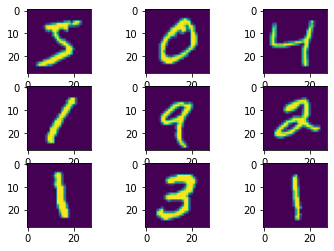

In [8]:
# plot first few images
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(X_train[i])
plt.show()

In [9]:
def showImage_label(x,y):
  plt.imshow(x)
  print("the image is ",y)

In [10]:
#X_train[0].shape

the image is  5


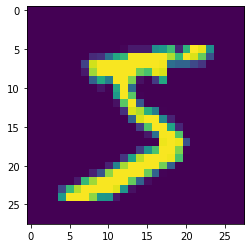

In [11]:
showImage_label(X_train[0],y_train[0])

In [12]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
#we cannot deal with 2d array in fully connected nn so we should reshape it`s size
#but cnn can do this 
def reshapeImages(x_train,x_test):
  X_train=x_train.reshape(x_train.shape[0],(x_train.shape[1]*x_train.shape[2]))
  X_test=x_test.reshape(x_test.shape[0],(x_test.shape[1]*x_test.shape[2]))
  return X_train,X_test

In [14]:
X_train_reshaped,X_test_reshaped=reshapeImages(X_train,X_test)

In [15]:
X_train_reshaped.shape

(60000, 784)

In [16]:
def preprocessing(array_images):
   max_pixel=array_images.max()
   array_images=array_images/max_pixel
   return array_images


In [17]:
X_train_reshaped=preprocessing(X_train_reshaped)
X_test_reshaped=preprocessing(X_test_reshaped)

In [18]:
X_train_reshaped.max()

1.0

In [19]:
#covnert y_train to categorical 
def to_ohe(labels):
  ohe_labels=to_categorical(labels)
  return ohe_labels

In [20]:
y_train=to_ohe(y_train)
y_test=to_ohe(y_test)

In [21]:
y_train.shape

(60000, 10)

MODELING

In [22]:
model=Sequential()
model.add(Dense(10,activation="softmax",input_shape=(28*28,)))
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
60000/128

468.75

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
#training
history_1=model.fit(X_train_reshaped,y_train,epochs=5,validation_split=.1,batch_size=128)


Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 0.6245 - accuracy: 0.8456 - val_loss: 0.3046 - val_accuracy: 0.9188
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.9056 - val_loss: 0.2611 - val_accuracy: 0.9277
Epoch 3/5
422/422 [==============================] - 1s 2ms/step - loss: 0.3121 - accuracy: 0.9134 - val_loss: 0.2455 - val_accuracy: 0.9318
Epoch 4/5
422/422 [==============================] - 1s 2ms/step - loss: 0.2974 - accuracy: 0.9174 - val_loss: 0.2390 - val_accuracy: 0.9348
Epoch 5/5
422/422 [==============================] - 1s 2ms/step - loss: 0.2889 - accuracy: 0.9193 - val_loss: 0.2358 - val_accuracy: 0.9348


In [27]:
loss_train,acc_train=model.evaluate(X_train_reshaped,y_train)
loss_test,acc_test=model.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.9224


In [28]:
# print(history_1.history.keys())
# #  "Accuracy"
# plt.plot(history_1.history['accuracy'])
# plt.plot(history_1.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# # "Loss"
# plt.plot(history_1.history['loss'])
# plt.plot(history_1.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

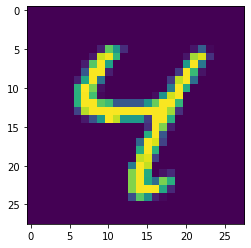

In [29]:
#let`s try on image to test model 
img_test=X_test[6]
plt.imshow(img_test)

In [30]:
#we must do the same preprocessing on the input image 
img_test.shape

(28, 28)

In [31]:
flat_img=img_test.reshape(1,28*28)

In [32]:
flat_img.shape

(1, 784)

In [33]:
flat_img=preprocessing(flat_img)

In [34]:
flat_img.max()

1.0

In [35]:
#predict image 
predict_image=model.predict(flat_img) 


 output is 10 probabilities the max prob is the number 

In [36]:
predict_image

array([[2.9432013e-06, 3.0719383e-07, 1.8200587e-06, 2.9253704e-04,
        9.7174758e-01, 5.5679115e-03, 8.2026236e-05, 5.4572697e-04,
        1.5067638e-02, 6.6915499e-03]], dtype=float32)

In [37]:
np.argmax(predict_image)

4

**SUMMARY**

In [38]:
print("test_accurecy",acc_test)
print("train_accurecy",acc_train)

test_accurecy 0.9223999977111816
train_accurecy 0.9227499961853027


## ADD more layer to improve our model

In [53]:
model_v2=Sequential()
model_v2.add(Dense(512,activation="relu",input_shape=(28*28,)))
model_v2.add(Dense(10,activation="softmax"))
model_v2.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])

In [54]:
model_v2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


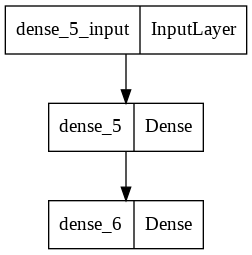

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(model_v2)

In [56]:
#training
history_1=model_v2.fit(X_train_reshaped,y_train,epochs=5,validation_split=.1,batch_size=128)


Epoch 1/5
422/422 [==============================] - 5s 10ms/step - loss: 0.2743 - accuracy: 0.9196 - val_loss: 0.1224 - val_accuracy: 0.9652
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1112 - accuracy: 0.9663 - val_loss: 0.0815 - val_accuracy: 0.9775
Epoch 3/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0807 - val_accuracy: 0.9748
Epoch 4/5
422/422 [==============================] - 4s 8ms/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.0735 - val_accuracy: 0.9785
Epoch 5/5
422/422 [==============================] - 4s 11ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0700 - val_accuracy: 0.9807


In [57]:
loss_train,acc_train=model_v2.evaluate(X_train_reshaped,y_train)
loss_test,acc_test=model_v2.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9789


# Note


##to keep on memory we can use sparse_categorical_crossentropy rather than to_categorical method 